# Atividade 3: Regressão logística

Segue abaixo o roteiro de tarefas:

1. Baixe o dataset _Stroke Prediction_ do Kaggle em formato CSV.
2. Carregue o dataset em um software de sua escolha (como R ou Python) e explore os dados para se familiarizar com as variáveis disponíveis.
3. Selecione as variáveis que você acha que podem ser relevantes para prever a ocorrência de AVC e prepare o dataset para a análise.
4. Divida o dataset em um conjunto de treinamento e um conjunto de testes.
5. Realize uma regressão logística no conjunto de treinamento, utilizando as variáveis selecionadas como preditores e a ocorrência de AVC como variável resposta.
6. Avalie o desempenho do modelo no conjunto de teste, utilizando métricas como a acurácia, a precisão, a sensibilidade e a especificidade.
7. Faça previsões no conjunto de testes utilizando o modelo e avalie o desempenho do modelo utilizando métricas de avaliação de previsão, como a curva ROC e a área sob a curva ROC.
8. Faça uma análise dos resultados e escreva um relatório descrevendo suas descobertas e recomendações.


link do dataset do Kaggle [aqui](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
dados = pd.read_csv('dados/a3_healthcare-dataset-stroke-data.csv')

**Análise exploratória de dados do dataset**:

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
for col in ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']:
    dados[col] = dados[col].astype('category')

Através do método info() estamos vendo que somente a coluna com BMI tem entradas nulas, mais especificamente 201 entradas. Acredito que a melhor forma de lidar com isso é calculando a média e trabalhando em cima disso, pois por mais que possamos perder uma certa quantidade de correlação, não quer dizer que será tão significativo para uma vez que a quantidade de entradas nulas é pequena.

In [5]:
dados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Para o método describe, vamos notar que as colunas de _hipertension_, _heart disease_ e _stroke_ são colunas booleanas que não adicionaram muita informação sobre os valores estatísticos. Para esse método, somente as colunas de Idade, level médio de glucose e de bmi(índice de massa corpórea) iriam servir para o describe.

In [6]:
#dados.set_index('id', inplace=True)
dados.drop('id', axis=1, inplace=True)

In [7]:
dados

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
dados[['age','avg_glucose_level','bmi']].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [9]:
print("Quantidade de homens e mulheres no dataset:")
print(dados['gender'].value_counts())
print('-------------------')
print(dados['gender'].value_counts(normalize=True)*100)

Quantidade de homens e mulheres no dataset:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
-------------------
Female    58.590998
Male      41.389432
Other      0.019569
Name: gender, dtype: float64


Dessa separação podemos ver que o dataset é composto por 58,6% de registro de homens e 41,4% de mulheres.

In [10]:
dados['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

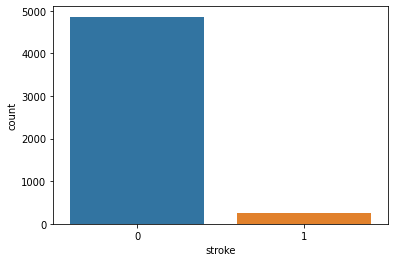

In [11]:
sns.countplot(data=dados,x=dados['stroke'])

Por causa dessa última análise, notamos que é necessário fazer o balanceamento dos dados devido a quantidade desbalanceada de casos de AVC. Mas só poderemos fazer isso depois de separar em treinamento e teste. 

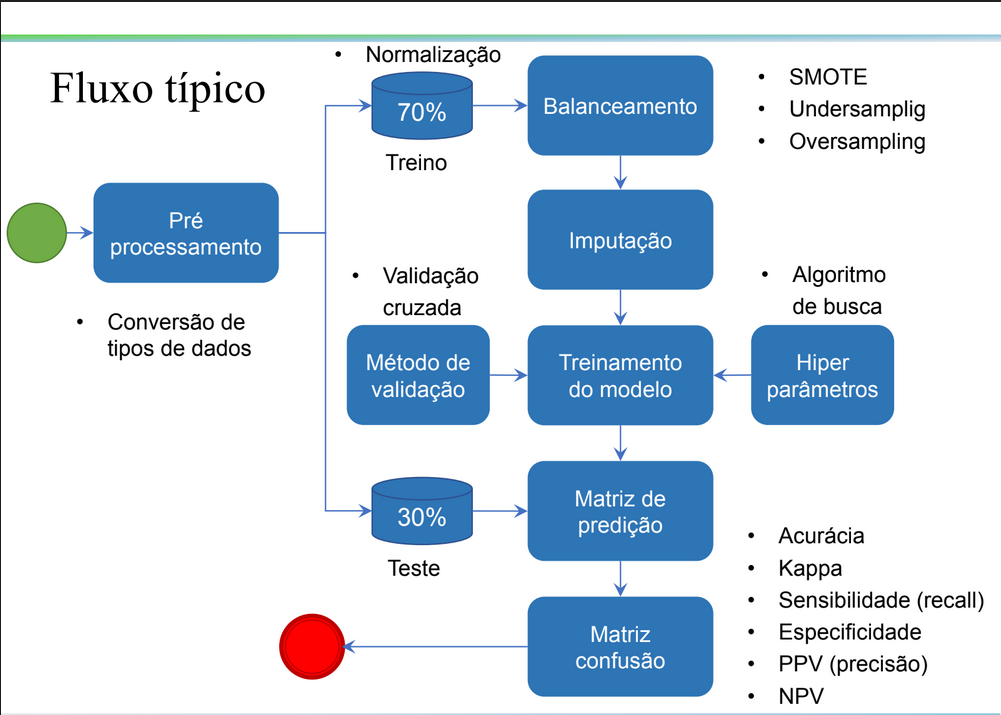

Ordem das coisas que faremos:

1. Pré-processamento

* Tratando dos **missing data**
* Tratamento sobre os dados categóricos, transformando em colunas de True e False para cada valor único (**get_dummies**)

2. Fazer a separação dos dados de treino e de teste para começar a fazer o tratamento para a modelagem. 

* **Feature Scaling** - Normalização
* Balanceamento dos dados - **Oversampling SMOTE**

Observação, fazer o feature scaling e o balanceamento dos dados tem que ser após a separação do dados de treino e teste para não haver enviesamento (data leakage) sobre o treino.

## Pré-processamento de dados

**Tratamento de Missing Data**

In [12]:
#dados_imputed = dados.copy()
dados.dropna(inplace=True)

**Transformando variáveis categóricas:**

Removendo as tuplas que estão em falta, vamos trabalhar agora em cima das variáveis categóricas que não poderão ser feitas os cálculos, trabalhar o cálculo em cima de string não é possível e por isso transformaremos os atributos categóricos em diversas colunas que referenciam os valores únicos de cada um dos atributos. Como exemplo na célula abaixo.

A partir disso faremos com cada coluna, e fazer a concatenação com o os atributos restantes.

In [13]:
pd.get_dummies(dados['gender'])

,Female,Male,Other
0,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,0,1,0
...,...,...,...
5104,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0


Feito como exemplo aqui com a coluna de gênero, para cada valor da coluna é gerado uma nova coluna que implica num crescimento da tabela se fizer para cada coluna categórica. 

In [14]:
object_cols = dados.select_dtypes(include='category').columns.values
object_cols

array(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'], dtype=object)

In [15]:
for col in object_cols:
  print(dados[col].unique())

['Male', 'Female', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Categories (5, object): ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']
['Urban', 'Rural']
Categories (2, object): ['Rural', 'Urban']
['formerly smoked', 'never smoked', 'smokes', 'Unknown']
Categories (4, object): ['Unknown', 'formerly smoked', 'never smoked', 'smokes']


In [16]:
dados = pd.concat([dados.drop(object_cols, axis=1),
                      pd.get_dummies(dados[object_cols], prefix=object_cols)], axis=1)
print(dados.shape)
#dados.head()
dados.info()

(4909, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4909 non-null   float64
 1   hypertension                    4909 non-null   int64  
 2   heart_disease                   4909 non-null   int64  
 3   avg_glucose_level               4909 non-null   float64
 4   bmi                             4909 non-null   float64
 5   stroke                          4909 non-null   int64  
 6   gender_Female                   4909 non-null   uint8  
 7   gender_Male                     4909 non-null   uint8  
 8   gender_Other                    4909 non-null   uint8  
 9   ever_married_No                 4909 non-null   uint8  
 10  ever_married_Yes                4909 non-null   uint8  
 11  work_type_Govt_job              4909 non-null   uint8  
 12  work_type_Never_worked 

<Axes: >

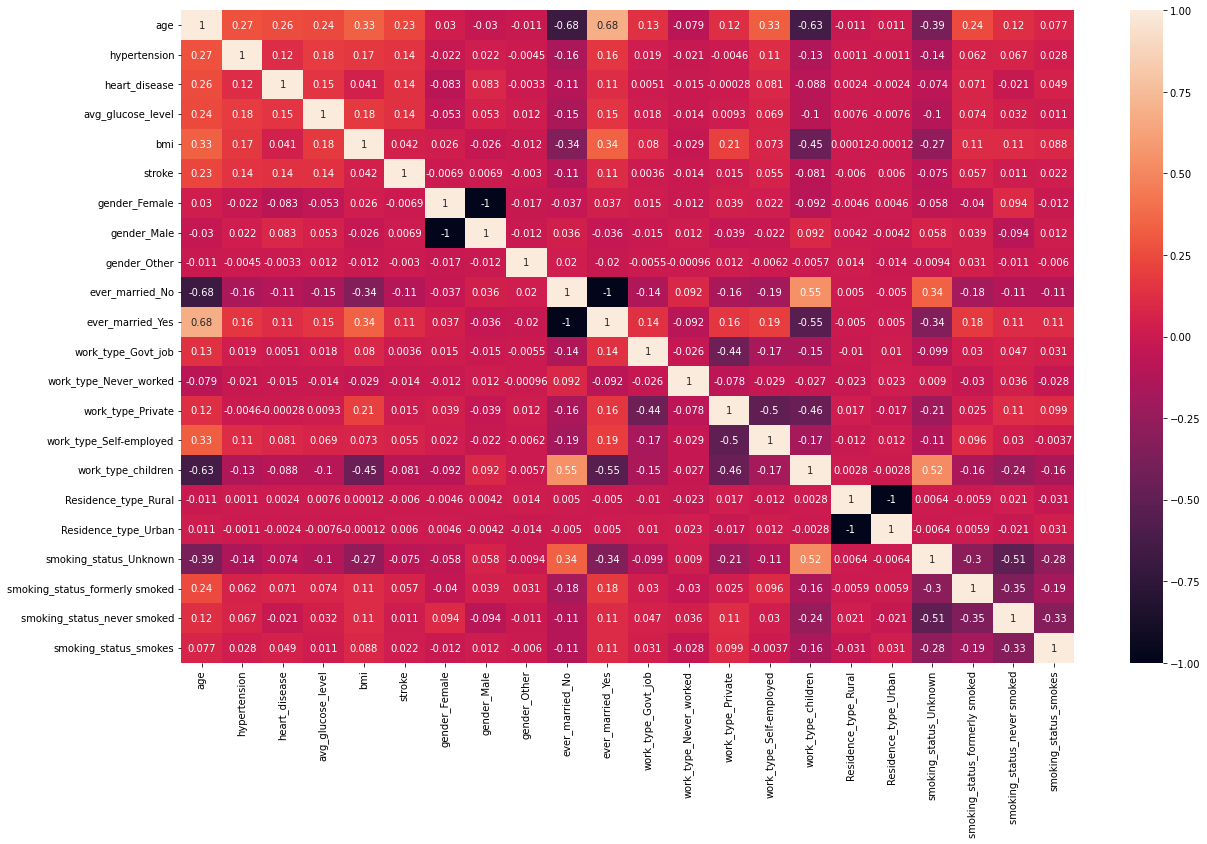

In [17]:
plt.figure(figsize=(20,12))
sns.heatmap(dados.corr(), annot=True)

É possível ver como cada uma das colunas se correlacionam! E aqueles que mais se relacionam com a variável de _stroke_ são:
* Age
* hypertension
* heart_disease
* Avg_glucose_level
* Ever_married_yes

## Separação de dados treino e teste.

In [18]:
#importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix

In [19]:
#Separando o modelo em teste e treino
X = dados.drop('stroke',axis=1).values
y = dados[['stroke']].values

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=124,
                                                     stratify = y)
#random number good 124, bad 143

**Feature Scaling**

Feita a separação de dados em Treino e em Teste, sendo o caso agora partiremos para a normalização, onde deveremos normalizar em treino e em teste separadamente. Mas isso faz sentido?

Fazer a normalização do teste separadamente não vai mostra alguns valores desviados de uma forma que não vai fazer sentido de acordo com o que fizemos no treino?

In [20]:
from sklearn.preprocessing import normalize

In [24]:
#Sobre os dados de Treino
train_X = normalize(train_X)
train_y = normalize(train_y)

In [25]:
#Sobre os dados de teste
valid_X = normalize(valid_X)
valid_y = normalize(valid_y)

**Balanceamento dos dados:**

In [26]:
#Balanceando dados de stroke

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
train_X, train_y = smt.fit_resample(train_X, train_y)  # Realiza a reamostragem do conjunto de dados


### Construindo o modelo:

In [27]:
#instanciando o modelo.
model = LogisticRegression()

Com os dados bem organizados e agora balanceados, podemos fazer o mapa de correlação para identificar quais são as features importantes para a construção do modelo preditivo.

Tendo definido esses focos, vamos agora preparar o terreno para aplicar o modelo de regressão logística sobre o dataset.

In [28]:
model.fit(train_X, train_y.ravel())

LogisticRegression()

In [29]:
#Coeficiente de Determinação R²
model.score(X,y)

0.057852923202281525

In [30]:
#Fazendo predição da parte de teste do modelo.
prediction_y = model.predict(valid_X)

In [31]:
print('Avaliação do Modelo pelas métricas:')
print('Precisão: {}%'.format((precision_score(valid_y,prediction_y, zero_division=1)*100).round(2)))
print('Acurácia: {}%'.format((accuracy_score(valid_y,prediction_y)*100).round(2)))
print('Sensibilidade/Recall: {}%'.format((recall_score(valid_y,prediction_y)*100).round(2)))
print(roc_auc_score(valid_y,prediction_y).round(2))
print(confusion_matrix(valid_y, prediction_y))

Avaliação do Modelo pelas métricas:
Precisão: 8.8%
Acurácia: 66.46%
Sensibilidade/Recall: 73.02%
0.7
[[933 477]
 [ 17  46]]


Por mais que agora esteja mais formatado a atividade ainda tem alguma coisa que está me incomodando, como uma mudança no random number até indo de 50% aé 100% de aproveitamento!